In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# define constant

FOLDER = 'datas/s20d15t1.6/'
GESTURES = ["lt", "rt", "u", "d"]
# GESTURES = ['d', 'ld', 'rd']
DATA_POINT_PER_GESTURE = 15

#

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Visualize raw data

In [3]:
# for g in GESTURES:
#     df = pd.read_csv(FOLDER + g + '.csv')
    
#     xs = range(1, len(df['aX']) + 1)
    
#     plt.rcParams['figure.figsize'] = (30, 15)
    
#     plt.plot(xs, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
#     plt.plot(xs, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
#     plt.plot(xs, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
#     plt.title("Acceleration")
#     plt.xlabel("Sample #")
#     plt.ylabel("Acceleration (G)")
#     plt.legend()
#     plt.show()

#     plt.plot(xs, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
#     plt.plot(xs, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
#     plt.plot(xs, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
#     plt.title("Gyroscope")
#     plt.xlabel("Sample #")
#     plt.ylabel("Gyroscope (deg/sec)")
#     plt.legend()
#     plt.show()

## Process data

In [4]:
inputs = []
outputs = []

ONE_HOTS = np.eye(len(GESTURES))

for i in range(len(GESTURES)):
    g = GESTURES[i]
    print(f"Processing {i} for gesture '{g}'.")
    
    output = ONE_HOTS[i]
    
    df = pd.read_csv(FOLDER + g + '.csv')
    num_recordings = int(df.shape[0] / DATA_POINT_PER_GESTURE)
    
    for j in range(num_recordings):
        tensor = []
        
        for k in range(DATA_POINT_PER_GESTURE):
            kk = j * DATA_POINT_PER_GESTURE + k
            
            tensor += [
                df['aX'][kk],
                df['aY'][kk],
                df['aZ'][kk],
                df['gX'][kk],
                df['gY'][kk],
                df['gZ'][kk],
#                 df['mX'][kk],
#                 df['mY'][kk],
#                 df['mZ'][kk],
            ]
            
        inputs.append(tensor)
        outputs.append(output)

Processing 0 for gesture 'lt'.
Processing 1 for gesture 'rt'.
Processing 2 for gesture 'u'.
Processing 3 for gesture 'd'.


In [5]:
# display(pd.DataFrame(inputs))

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.666,0.473,0.162,0.524,0.489,0.503,0.687,0.405,0.113,0.550,...,0.905,0.509,0.406,0.478,0.304,0.285,0.867,0.500,0.448,0.480
1,0.650,0.503,0.161,0.556,0.480,0.504,0.641,0.480,0.112,0.583,...,0.937,0.511,0.403,0.470,0.318,0.243,0.906,0.500,0.451,0.475
2,0.591,0.450,0.032,0.549,0.356,0.497,0.277,0.391,0.028,0.531,...,0.760,0.500,0.530,0.497,0.361,0.274,0.685,0.498,0.553,0.506
3,0.574,0.467,0.069,0.560,0.396,0.506,0.451,0.455,0.042,0.553,...,0.886,0.501,0.500,0.485,0.337,0.231,0.792,0.502,0.538,0.492
4,0.557,0.480,0.131,0.564,0.408,0.502,0.437,0.444,0.109,0.566,...,0.842,0.502,0.515,0.494,0.350,0.237,0.746,0.508,0.548,0.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.431,0.874,0.511,0.526,0.511,0.480,0.405,0.805,0.544,0.555,...,0.653,0.542,0.495,0.518,0.485,0.177,0.626,0.541,0.512,0.525
76,0.401,0.563,0.609,0.487,0.554,0.351,0.356,0.503,0.566,0.460,...,0.504,0.503,0.522,0.512,0.525,0.320,0.466,0.492,0.520,0.502
77,0.375,0.157,0.357,0.387,0.545,0.254,0.381,0.126,0.312,0.368,...,0.447,0.479,0.503,0.497,0.534,0.358,0.465,0.479,0.497,0.498
78,0.369,0.708,0.615,0.555,0.525,0.399,0.351,0.609,0.622,0.511,...,0.619,0.521,0.526,0.526,0.516,0.286,0.549,0.510,0.532,0.517


## Create train/validate/test datas

In [6]:
rdm_index = np.arange(len(inputs))
np.random.shuffle(rdm_index)

inputs = np.array(inputs)[rdm_index]
outputs = np.array(outputs)[rdm_index]

TRAIN_SPLIT = int(0.5 * len(inputs))
TEST_SPLIT = int(TRAIN_SPLIT + 0.25 * len(inputs))

i_train, i_validate, i_test = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
o_train, o_validate, o_test = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

# do this if data type invalid
i_train = tf.convert_to_tensor(i_train, dtype=tf.float32)
o_train = tf.convert_to_tensor(o_train, dtype=tf.float32)

i_validate = tf.convert_to_tensor(i_validate, dtype=tf.float32)
o_validate = tf.convert_to_tensor(o_validate, dtype=tf.float32)

## Build and train the model

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

METRICS = 'mae'

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(len(GESTURES))
    tf.keras.layers.Dense(len(GESTURES), activation='softmax')
])

# loss_fn = tf.keras.losses.CategoricalCrossentropy()

# model.compile(optimizer='adam', loss=loss_fn, metrics=[METRICS])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(i_train, o_train,
                       epochs=100, batch_size=1,
                   validation_data=(i_validate, o_validate))

Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 0.1910 - mae: 0.3757 - val_loss: 0.1850 - val_mae: 0.3709
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1819 - mae: 0.3680 - val_loss: 0.1790 - val_mae: 0.3658
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1767 - mae: 0.3618 - val_loss: 0.1741 - val_mae: 0.3605
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1710 - mae: 0.3569 - val_loss: 0.1730 - val_mae: 0.3553
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1652 - mae: 0.3492 - val_loss: 0.1671 - val_mae: 0.3473
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1592 - mae: 0.3402 - val_loss: 0.1577 - val_mae: 0.3387
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1511 - mae: 0.3298 - val_loss: 0.1502 - val_mae: 0.3292
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1428 - m

In [9]:
# performance before train
model(i_train[:1])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[1.8713506e-10, 9.9191368e-01, 2.8321792e-03, 5.2541653e-03]],
      dtype=float32)>

## Review model's performance

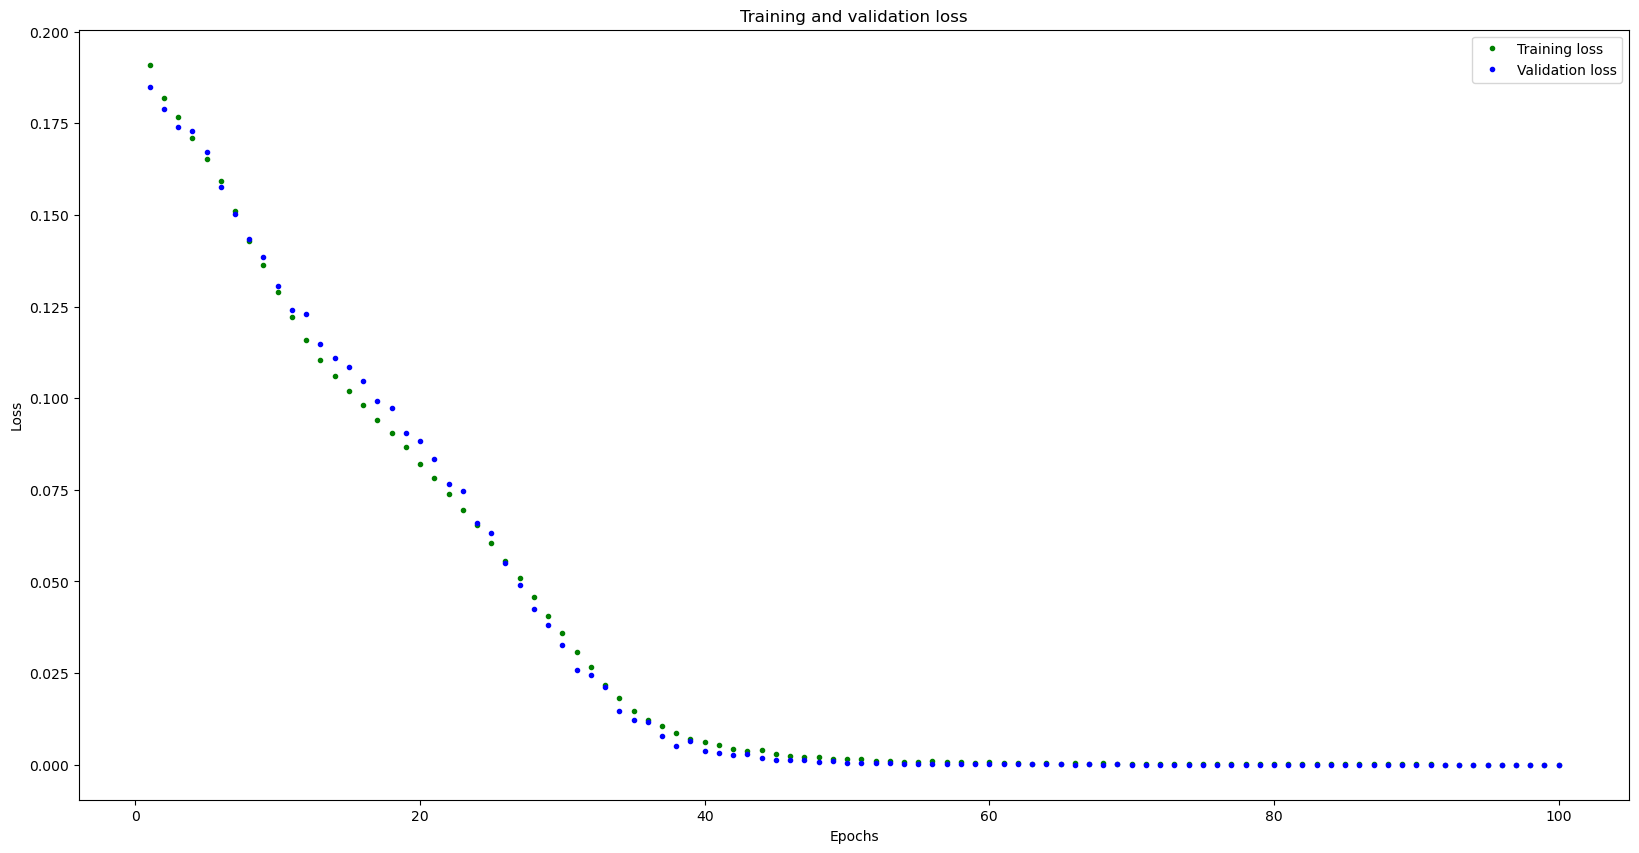

[20.0, 10.0]


In [10]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Mean absolute error

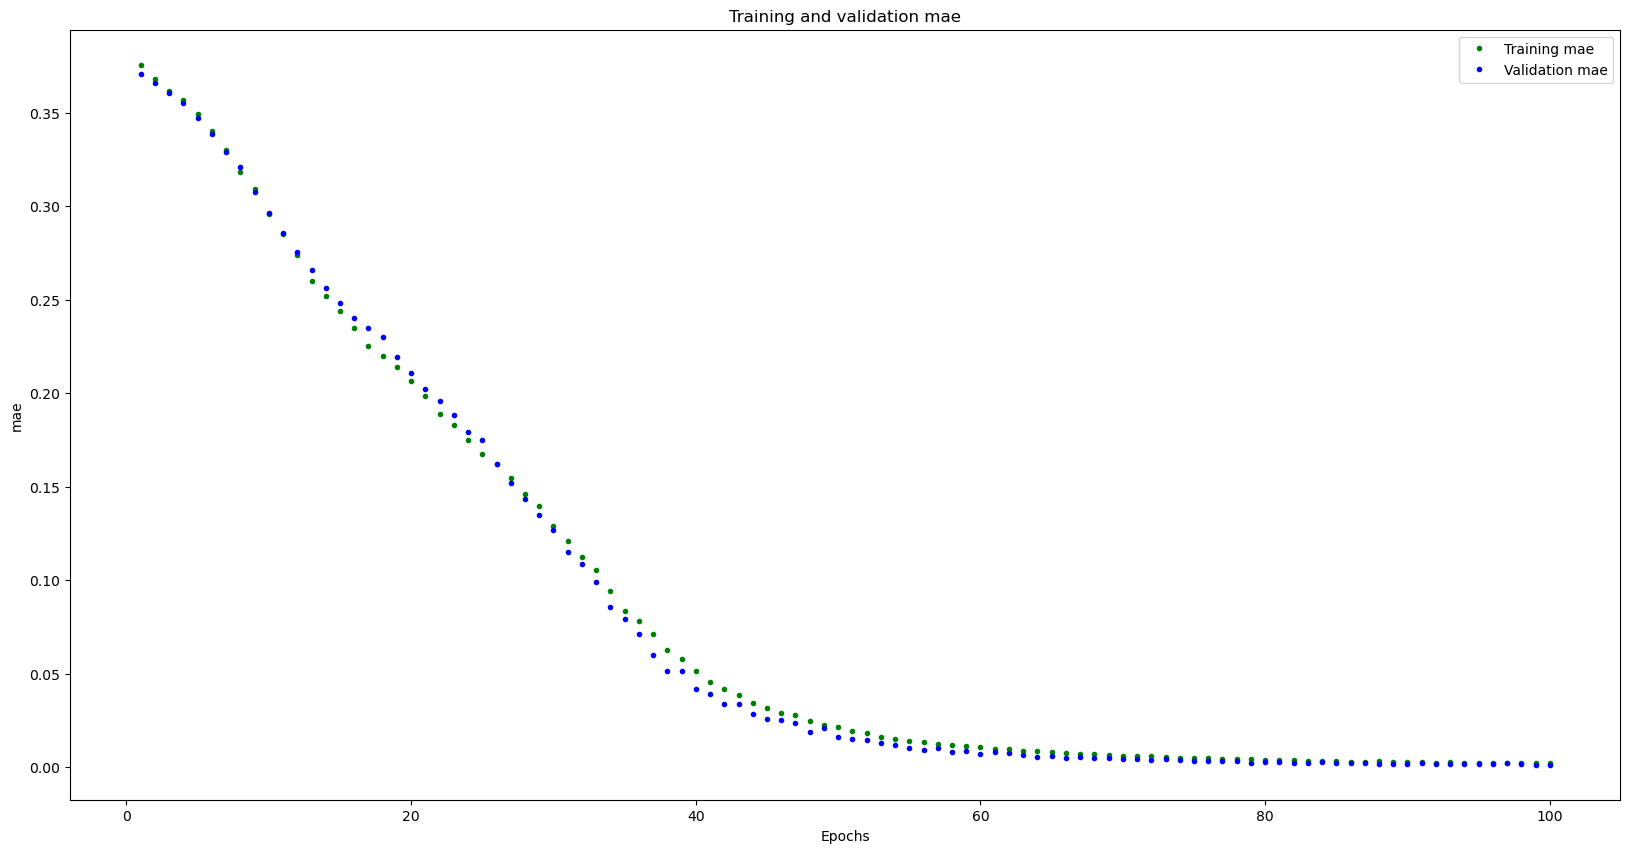

In [11]:
# graph of mean absolute error
mae = history.history[METRICS]
val_mae = history.history['val_' + METRICS]
plt.plot(epochs, mae, 'g.', label='Training ' + METRICS)
plt.plot(epochs, val_mae, 'b.', label='Validation ' + METRICS)
plt.title('Training and validation ' + METRICS)
plt.xlabel('Epochs')
plt.ylabel(METRICS)
plt.legend()
plt.show()

## Verify with test data

In [12]:
i_test = tf.convert_to_tensor(i_test, dtype=tf.float32)

# use the model to predict the test inputs
predictions = model.predict(i_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", o_test)

1/1 [==============================] - 0s 208ms/step
predictions =
 [[0.999 0.    0.001 0.   ]
 [0.    0.005 0.986 0.009]
 [0.999 0.    0.001 0.   ]
 [0.    0.002 0.001 0.998]
 [0.    0.001 0.003 0.996]
 [0.    0.001 0.001 0.998]
 [0.    1.    0.    0.   ]
 [0.    0.002 0.001 0.997]
 [0.    1.    0.    0.   ]
 [0.999 0.    0.001 0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.001 0.001 0.998]
 [0.    0.001 0.993 0.005]
 [0.996 0.    0.003 0.   ]
 [0.999 0.    0.001 0.   ]
 [0.    0.002 0.002 0.996]
 [0.    0.006 0.198 0.795]
 [0.    1.    0.    0.   ]
 [0.    0.001 0.001 0.998]
 [0.    0.998 0.    0.002]]
actual =
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


## Produce model file (.tflite)

Output both non-quantized and quantized model files


In [13]:
TFLITE_FILE = 'tflite/gesture_model.tflite'
TFLITE_FILE_Q = 'tflite/gesture_model_q.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open(TFLITE_FILE, "wb").write(tflite_model)


converter_q = tf.lite.TFLiteConverter.from_keras_model(model)
converter_q.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
 # each scalar value inside a 2D array that is wrapped in a list
 for value in inputs:
     yield [np.array(value, dtype=np.float32, ndmin=2)]

converter_q.representative_dataset = representative_dataset_generator
tflite_model_q = converter_q.convert()

open(TFLITE_FILE_Q, "wb").write(tflite_model_q)


# Review size difference
basic_model_size = os.path.getsize(TFLITE_FILE)
print("Basic model is %d bytes" % basic_model_size)

basic_model_size_q = os.path.getsize(TFLITE_FILE_Q)
print("Quantized model is %d bytes" % basic_model_size_q)

INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp18srbxuv\assets
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpq95qgrxw\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpq95qgrxw\assets


Basic model is 8604 bytes
Quantized model is 4544 bytes


C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


## Verify the interpreter (.tflite)

In [14]:
_model = tf.lite.Interpreter(TFLITE_FILE)

_model.allocate_tensors()

_model_input_index = _model.get_input_details()[0]['index']
_model_output_index = _model.get_output_details()[0]['index']

_model_predictions = []

for i in i_test:
    # write the value to the input tensor
    i_tensor = tf.convert_to_tensor([i], dtype=tf.float32)
    _model.set_tensor(_model_input_index, i_tensor)
    # run inference
    _model.invoke()
    # read the prediction from the output tensor
    _model_predictions.append(_model.get_tensor(_model_output_index)[0])

# print the predictions and the expected ouputs
print("model predictions =\n", np.round(_model_predictions, decimals=3))
print("actual =\n", o_test)

model predictions =
 [[0.999 0.    0.001 0.   ]
 [0.    0.005 0.986 0.009]
 [0.999 0.    0.001 0.   ]
 [0.    0.002 0.001 0.998]
 [0.    0.001 0.003 0.996]
 [0.    0.001 0.001 0.998]
 [0.    1.    0.    0.   ]
 [0.    0.002 0.001 0.997]
 [0.    1.    0.    0.   ]
 [0.999 0.    0.001 0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.001 0.001 0.998]
 [0.    0.001 0.993 0.005]
 [0.996 0.    0.003 0.   ]
 [0.999 0.    0.001 0.   ]
 [0.    0.002 0.002 0.996]
 [0.    0.006 0.198 0.795]
 [0.    1.    0.    0.   ]
 [0.    0.001 0.001 0.998]
 [0.    0.998 0.    0.002]]
actual =
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


## Verify the quantized interpreter (.tflite)

In [15]:
_model_q = tf.lite.Interpreter(TFLITE_FILE_Q)

_model_q.allocate_tensors()

_model_q_input_index = _model_q.get_input_details()[0]['index']
_model_q_output_index = _model_q.get_output_details()[0]['index']

_model_q_predictions = []

for i in i_test:
    # write the value to the input tensor
    i_tensor = tf.convert_to_tensor([i], dtype=tf.float32)
    _model_q.set_tensor(_model_q_input_index, i_tensor)
    # run inference
    _model_q.invoke()
    # read the prediction from the output tensor
    _model_q_predictions.append(_model_q.get_tensor(_model_q_output_index)[0])

# print the predictions and the expected ouputs
print("quantized model predictions =\n", np.round(_model_q_predictions, decimals=3))
print("actual =\n", o_test)

quantized model predictions =
 [[0.996 0.    0.    0.   ]
 [0.    0.008 0.984 0.012]
 [0.996 0.    0.    0.   ]
 [0.    0.    0.    0.996]
 [0.    0.    0.004 0.996]
 [0.    0.    0.    0.996]
 [0.    0.996 0.    0.   ]
 [0.    0.004 0.    0.996]
 [0.    0.996 0.    0.   ]
 [0.996 0.    0.    0.   ]
 [0.    0.996 0.    0.   ]
 [0.    0.    0.    0.996]
 [0.    0.    0.992 0.008]
 [0.996 0.    0.004 0.   ]
 [0.996 0.    0.    0.   ]
 [0.    0.    0.004 0.996]
 [0.    0.008 0.191 0.801]
 [0.    0.996 0.    0.   ]
 [0.    0.    0.    0.996]
 [0.    0.996 0.    0.   ]]
actual =
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


## Produce the model header file

In [16]:
# to run below command, ensure jupyter notebook is launched under bash terminal (eg. git bash, linux terminal)

HEADER_FILE = '../ble_client/gesture_model.h'
HEADER_FILE_Q = '../ble_client/gesture_model_q.h'
# based model header file
str1 = "const unsigned char {} [] = {{".format('gesture_model')
str2 = "};"

!echo {str1}  > {HEADER_FILE}
!cat {TFLITE_FILE} | xxd -i >> {HEADER_FILE}
!echo {str2} >> {HEADER_FILE}

# quantized model header file
str3 = "const unsigned char {} [] = {{".format('gesture_model_q')

!echo {str3}  > {HEADER_FILE_Q}
!cat {TFLITE_FILE_Q} | xxd -i >> {HEADER_FILE_Q}
!echo {str2} >> {HEADER_FILE_Q}